In [35]:
# import data set

import os
import pandas as pd
from sklearn import datasets


df = pd.read_csv('agaricus-lepiota.csv')

dummies = pd.get_dummies(df)
dummies_column_names = list(dummies.columns)
dummies


,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [36]:
# KMeans




In [37]:
# evaluate using sillhouette_score

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics

def uniform_labelings_scores(n_samples, n_clusters_range,
                             fixed_n_classes=None, n_runs=5, seed=42):
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    for i, k in enumerate(n_clusters_range):
        km = KMeans(n_clusters=k)
        km = km.fit(dummies)
        labels = km.labels_
        silscore = metrics.silhouette_score(dummies, labels, metric='euclidean')
        scores[i] = silscore
        print("k=%i: %f, %f"%(k,silscore,km.inertia_))

    return scores

n_samples = 30
samples_divisor = n_samples
n_clusters_range = np.linspace(2, n_samples, samples_divisor).astype(np.int)

t0 = time()
scores = uniform_labelings_scores(n_samples, n_clusters_range)
print("done in %0.3fs" % (time() - t0))

k=2: 0.180325, 79831.624122
k=2: 0.180325, 79831.624122
k=3: 0.228323, 67842.898153
k=4: 0.230086, 59941.475879
k=5: 0.260261, 54434.330410
k=6: 0.277307, 50685.125616
k=7: 0.290557, 48568.983871
k=8: 0.293878, 46759.110531
k=9: 0.299881, 45022.490540
k=10: 0.246315, 43414.999642
k=11: 0.265945, 41984.910925
k=12: 0.227609, 41546.510777
k=13: 0.201418, 40265.897351
k=14: 0.165237, 39294.878325
k=15: 0.209116, 38580.498668
k=16: 0.215772, 37706.299594
k=17: 0.164623, 37298.687538
k=18: 0.165921, 36934.752596
k=19: 0.170403, 36538.638083
k=20: 0.147273, 35895.460906
k=21: 0.144111, 35609.547988
k=22: 0.150555, 34893.516184
k=23: 0.144843, 34653.399788
k=24: 0.153907, 33858.943763
k=25: 0.157492, 33377.421379
k=26: 0.160290, 33026.288767
k=27: 0.155413, 32730.246252
k=28: 0.158083, 31883.428571
k=29: 0.158856, 32050.559820
k=30: 0.146792, 31783.758054
done in 63.237s


[0.18032497 0.18032497 0.22832287 0.23008597 0.26026137 0.27730679
 0.29055744 0.29387813 0.29988119 0.24631543 0.26594536 0.22760897
 0.20141817 0.1652373  0.20911567 0.21577247 0.16462272 0.16592145
 0.17040298 0.14727328 0.14411074 0.15055524 0.14484326 0.15390733
 0.15749215 0.1602897  0.1554131  0.15808327 0.15885573 0.14679191]


Text(0.5, 0, 'number of clusters')

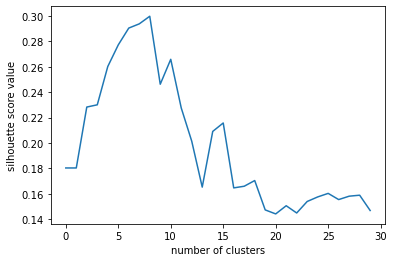

In [38]:
# visualize score rating for each number of clusters

scores = scores[:, 0]
print(scores)
plt.plot(scores)
plt.ylabel('silhouette score value')
plt.xlabel('number of clusters')

optimal number of clusters: 9


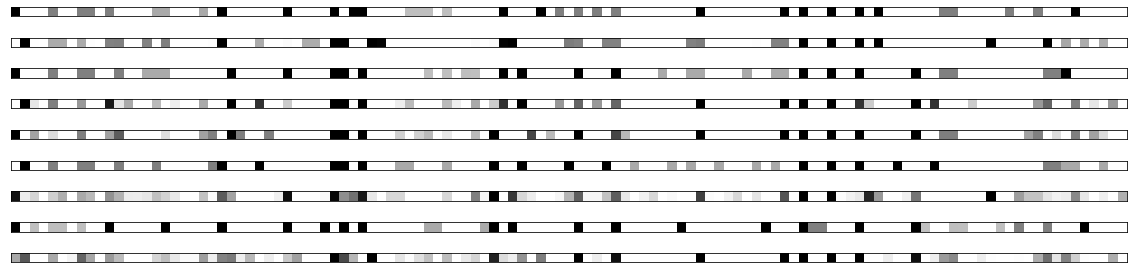

In [40]:
# projection for each cluster (horizontal lines) showing distance from center for each of the 119 dummies

from sklearn.cluster import KMeans
k = np.argmax(scores) + 1
print('optimal number of clusters: %d' % k)

kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(dummies)

fig, ax = plt.subplots(k, 1, figsize=(20, 5))
centers = kmeans.cluster_centers_.reshape(k, 1, 119)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)